In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root= '/content/drive/MyDrive/Deep Learning/pytorch_zero_to_gans/data', download = True)

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Deep Learning/pytorch_zero_to_gans/data
    Split: Train

In [4]:
len(dataset)

60000

In [5]:
test_dataset = MNIST(root = '/content/drive/MyDrive/Deep Learning/pytorch_zero_to_gans/data', train = False)
len(test_dataset)

10000

Let's take a look at the sample

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

It's a pair, consisting of a 28x28px image and a label. The image is an object of the class PIL.Image.Image ,
which is a part of the Python imaging library Pillow. We can view the image within Jupyter using matplotlib ,
the de-facto plotting and graphing library for data science in Python.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Label 5


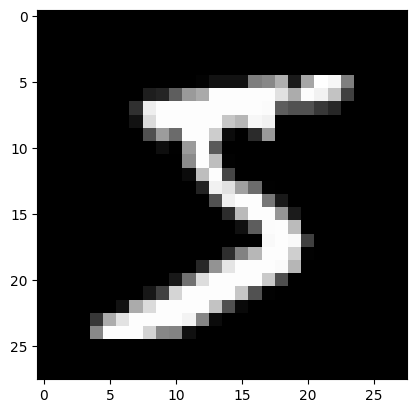

In [8]:
image, label = dataset[0]
plt.imshow(image, cmap = 'gray')
print('Label' , label)

Label 3


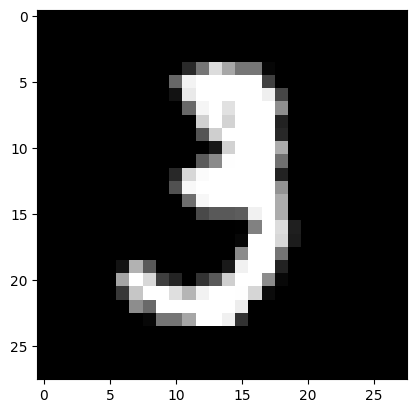

In [9]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print('Label' , label)

It's evident that these images are relatively small in size, and recognizing the digits can sometimes be challenging
even for the human eye. While it's useful to look at these images, there's just one problem here: PyTorch doesn't
know how to work with images. We need to convert the images into tensors. We can do this by specifying a
transform while creating our dataset.

# Converting the dataset to tensors

In [10]:
import torchvision.transforms as transforms

In [11]:
# MNIST dataset (images and labels)
dataset = MNIST(root = '/content/drive/MyDrive/Deep Learning/pytorch_zero_to_gans/data',
                train = True,
                transform= transforms.ToTensor())

In [12]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [13]:
print(img_tensor[:, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


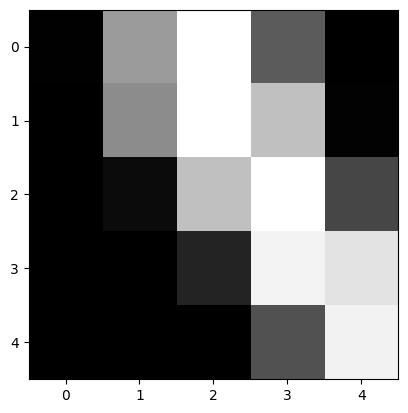

In [14]:
# Plot the image by passing in the 28 x 28 matrix
plt.imshow(img_tensor[0, 10:15, 10:15], cmap = 'gray')

# Training and Validation Datasets

In [15]:
from torch.utils.data import random_split, DataLoader

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

It's essential to choose a random sample for creating a validation set. Training data is often sorted by the target
labels, i.e., images of 0s, followed by 1s, followed by 2s, etc. If we create a validation set using the last 20% of
images, it would only consist of 8s and 9s. In contrast, the training set would contain no 8s or 9s. Such a trainingvalidation would make it impossible to train a useful model.

In [16]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size , shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

# Model

Now that we have prepared our data loaders, we can de

In [17]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

Let's look at the weights and biases

In [18]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0148,  0.0273, -0.0223,  ..., -0.0148, -0.0087, -0.0165],
         [-0.0013, -0.0329,  0.0288,  ...,  0.0038,  0.0020, -0.0311],
         [-0.0189,  0.0176, -0.0228,  ...,  0.0167, -0.0127,  0.0241],
         ...,
         [ 0.0346,  0.0005,  0.0018,  ...,  0.0210, -0.0349,  0.0242],
         [ 0.0075, -0.0048, -0.0008,  ..., -0.0139,  0.0233,  0.0310],
         [-0.0353, -0.0066, -0.0213,  ..., -0.0351, -0.0243,  0.0212]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0347, -0.0324, -0.0040,  0.0133, -0.0143, -0.0170,  0.0079, -0.0046,
         -0.0217, -0.0079], requires_grad=True)]

In [19]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0148,  0.0273, -0.0223,  ..., -0.0148, -0.0087, -0.0165],
        [-0.0013, -0.0329,  0.0288,  ...,  0.0038,  0.0020, -0.0311],
        [-0.0189,  0.0176, -0.0228,  ...,  0.0167, -0.0127,  0.0241],
        ...,
        [ 0.0346,  0.0005,  0.0018,  ...,  0.0210, -0.0349,  0.0242],
        [ 0.0075, -0.0048, -0.0008,  ..., -0.0139,  0.0233,  0.0310],
        [-0.0353, -0.0066, -0.0213,  ..., -0.0351, -0.0243,  0.0212]],
       requires_grad=True)

In [20]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0347, -0.0324, -0.0040,  0.0133, -0.0143, -0.0170,  0.0079, -0.0046,
        -0.0217, -0.0079], requires_grad=True)

Although there are a total of 7850 parameters here, conceptually, nothing has changed so far. Let's try and
generate some outputs using our model. We'll take the first batch of the 100 images and pass it into our model

In [21]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([9, 0, 6, 3, 2, 5, 7, 6, 0, 0, 6, 8, 3, 7, 7, 8, 0, 1, 3, 5, 0, 7, 6, 3,
        3, 8, 3, 6, 9, 3, 5, 6, 6, 4, 3, 7, 4, 7, 6, 8, 6, 0, 7, 5, 7, 9, 8, 9,
        9, 5, 3, 7, 6, 6, 4, 8, 4, 0, 1, 4, 0, 2, 2, 0, 2, 7, 7, 3, 4, 9, 2, 9,
        1, 9, 4, 7, 8, 9, 0, 6, 0, 0, 2, 5, 2, 6, 2, 5, 6, 8, 4, 7, 7, 2, 4, 0,
        9, 7, 6, 0, 6, 6, 7, 9, 7, 3, 4, 9, 3, 0, 4, 1, 1, 8, 6, 9, 2, 5, 6, 9,
        9, 7, 2, 2, 3, 1, 8, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

The code above leads to an error because our input data does not have the right shape. Our images are of the
shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them

In [22]:
images.shape

torch.Size([128, 1, 28, 28])

In [23]:
images.reshape(128, 784).shape

torch.Size([128, 784])

To include this additional functionality within our model, we need to define a custom model, by extending the `nn.Module` class

In [24]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)


  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out


model = MnistModel()

In [25]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0014, -0.0007,  0.0357,  ..., -0.0349,  0.0146,  0.0185],
         [ 0.0020,  0.0349, -0.0150,  ..., -0.0191,  0.0245,  0.0092],
         [-0.0249, -0.0169, -0.0193,  ..., -0.0312, -0.0018,  0.0104],
         ...,
         [ 0.0020, -0.0200, -0.0338,  ...,  0.0231,  0.0238, -0.0257],
         [ 0.0289,  0.0265,  0.0040,  ...,  0.0279,  0.0005, -0.0262],
         [ 0.0115, -0.0282,  0.0166,  ..., -0.0051,  0.0087,  0.0193]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0205,  0.0164,  0.0035, -0.0136,  0.0030, -0.0022,  0.0024,  0.0070,
          0.0055, -0.0266], requires_grad=True)]

We can use our new custom model in the same way as before. Let's see if it works.

In [26]:
for images, labels in train_loader:
  print('images.shape : ', images.shape)
  outputs = model(images)
  break

print('outputs.shape : ', outputs.shape)
print('Sample outputs : \n', outputs[:2].data)

images.shape :  torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs : 
 tensor([[ 0.0253,  0.2298,  0.1232,  0.2154,  0.2995, -0.1056, -0.2384,  0.0351,
          0.0509, -0.0473],
        [ 0.0773, -0.0800,  0.0724,  0.1491, -0.0147, -0.0915, -0.0083,  0.1408,
          0.0152,  0.1445]])


In [27]:
outputs[0]

tensor([ 0.0253,  0.2298,  0.1232,  0.2154,  0.2995, -0.1056, -0.2384,  0.0351,
         0.0509, -0.0473], grad_fn=<SelectBackward0>)

In [28]:
exps = torch.exp(outputs[0])
exps

tensor([1.0256, 1.2584, 1.1312, 1.2403, 1.3492, 0.8998, 0.7879, 1.0358, 1.0522,
        0.9538], grad_fn=<ExpBackward0>)

In [29]:
probs = exps / torch.sum(exps)
probs

tensor([0.0955, 0.1172, 0.1054, 0.1155, 0.1257, 0.0838, 0.0734, 0.0965, 0.0980,
        0.0889], grad_fn=<DivBackward0>)

In [30]:
torch.sum(probs)

tensor(1.0000, grad_fn=<SumBackward0>)

# Softmax

The softmax function is included in the torch.nn.functional package and requires us to specify a dimension
along which the function should be applied

In [31]:
import torch.nn.functional as F

In [32]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim = 1)

# Look at the sample probabilities
print('Sample probabilities: \n', probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities: 
 tensor([[0.0955, 0.1172, 0.1054, 0.1155, 0.1257, 0.0838, 0.0734, 0.0965, 0.0980,
         0.0889],
        [0.1034, 0.0883, 0.1029, 0.1111, 0.0943, 0.0873, 0.0949, 0.1102, 0.0972,
         0.1106]])
Sum:  0.9999999403953552


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the
highest probability in each output row. We can do this using `torch.max` , which returns each row's largest
element and the corresponding index.

In [34]:
max_probs, preds = torch.max(probs, dim = 1)
print(preds)
print(max_probs)

tensor([4, 3, 1, 4, 3, 4, 4, 4, 2, 2, 2, 4, 3, 2, 0, 4, 0, 2, 3, 2, 3, 2, 1, 0,
        2, 4, 3, 4, 3, 0, 1, 4, 4, 7, 5, 7, 3, 1, 3, 4, 0, 0, 8, 4, 9, 7, 2, 4,
        2, 4, 4, 2, 4, 7, 0, 9, 0, 4, 2, 7, 4, 2, 4, 4, 2, 0, 2, 2, 4, 2, 2, 8,
        2, 4, 3, 4, 2, 1, 7, 2, 4, 4, 9, 0, 2, 1, 4, 3, 4, 5, 3, 8, 2, 0, 2, 7,
        3, 4, 2, 4, 5, 4, 5, 3, 4, 0, 2, 1, 0, 4, 4, 4, 4, 2, 2, 2, 3, 9, 7, 0,
        4, 9, 2, 4, 4, 4, 7, 0])
tensor([0.1257, 0.1111, 0.1225, 0.1243, 0.1213, 0.1267, 0.1172, 0.1392, 0.1172,
        0.1201, 0.1401, 0.1424, 0.1174, 0.1192, 0.1289, 0.1325, 0.1403, 0.1165,
        0.1178, 0.1262, 0.1303, 0.1206, 0.1305, 0.1313, 0.1190, 0.1387, 0.1269,
        0.1252, 0.1283, 0.1267, 0.1229, 0.1574, 0.1225, 0.1248, 0.1294, 0.1334,
        0.1291, 0.1137, 0.1177, 0.1194, 0.1258, 0.1239, 0.1227, 0.1337, 0.1236,
        0.1186, 0.1196, 0.1191, 0.1307, 0.1367, 0.1204, 0.1239, 0.1370, 0.1251,
        0.1107, 0.1153, 0.1553, 0.1257, 0.1344, 0.1349, 0.1224, 0.1241, 0.1442,
       

Let's compare them with the label

In [35]:
labels

tensor([2, 4, 6, 9, 4, 8, 9, 0, 2, 9, 4, 9, 0, 5, 1, 9, 3, 9, 8, 9, 8, 1, 0, 3,
        7, 4, 9, 0, 8, 3, 4, 8, 8, 2, 2, 7, 0, 7, 6, 5, 1, 2, 8, 5, 0, 8, 7, 3,
        4, 3, 5, 1, 0, 5, 3, 4, 4, 4, 6, 3, 4, 1, 2, 7, 8, 1, 5, 7, 8, 1, 1, 8,
        3, 4, 0, 0, 2, 4, 4, 1, 4, 8, 9, 1, 5, 9, 3, 4, 3, 6, 6, 3, 1, 8, 1, 7,
        0, 8, 8, 7, 1, 6, 3, 0, 7, 1, 7, 0, 1, 0, 3, 8, 0, 9, 4, 2, 8, 8, 7, 1,
        4, 4, 4, 6, 8, 5, 1, 5])

# Evaluation Metric and Loss Function

Just as with linear regression, we need a way to evaluate how well our model is performing. A natural way to do
this would be to

In [36]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim = 1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))


In [37]:
accuracy(outputs, labels)

tensor(0.1172)

In [38]:
outputs

tensor([[ 0.0253,  0.2298,  0.1232,  ...,  0.0351,  0.0509, -0.0473],
        [ 0.0773, -0.0800,  0.0724,  ...,  0.1408,  0.0152,  0.1445],
        [-0.1703,  0.1721,  0.0944,  ..., -0.1441,  0.0065, -0.1468],
        ...,
        [-0.2141, -0.0231, -0.0838,  ..., -0.0880, -0.0394, -0.0808],
        [ 0.2929,  0.0220,  0.1713,  ...,  0.3106,  0.0207,  0.2124],
        [ 0.1767, -0.0589,  0.0277,  ..., -0.1132, -0.0567,  0.0964]],
       grad_fn=<AddmmBackward0>)

In [39]:
loss_fn = F.cross_entropy

In [40]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3136, grad_fn=<NllLossBackward0>)


# Training the model

Here's what it looks like in pseudocode:



```
for epoch in range(num_epochs):
  # Training phase
  for batch in train_loader:
    # Generate predictions
    # Calculate loss
    # Compute gradients
    # Update weights
    # Reset gradients
  # Validation phase
  for batch in val_loader:
    # Generate predictions
    # Calculate loss
    # Calculate metrics (accuracy etc.)
  # Calculate average validation loss & metrics
  # Log epoch, loss & metrics for inspection

```



In [77]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    output = self(images) # Generate predictions
    loss = F.cross_entropy(output, labels) # Calculate loss
    return loss

  def validation_step(self, batch):
    images, labels = batch
    output = self(images) # Generate prediction
    loss = F.cross_entropy(output, labels) # Calculate loss
    acc = accuracy(output, labels) # Calculate the accuracy
    return {"val_loss": loss, "val_acc" : acc}

  def validation_epoch_end(self, outputs):
    batch_loss = [x['val_loss'] for x in outputs]
    batch_acc = [x['val_acc'] for x in outputs]
    epoch_loss = torch.stack(batch_loss).mean() # Combine losses
    epoch_acc = torch.stack(batch_acc).mean() # Combine accuracies
    return {'val_loss' : epoch_loss.item(), 'val_acc' : epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print(f"Epoch [{epoch}], val_loss : {result['val_loss']:.4f}, val_acc : {result['val_acc']:.4f}")

model = MnistModel()

In [78]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, model, lr, train_loader, val_loader, opt_func = torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history = []

  for epoch in range(epochs):

    # Training
    for batch in train_loader:
      loss = model.training_step(batch) # Generate prediction and calculating the loss
      loss.backward() # Find the gradient
      optimizer.step() # Update the step by optimizing
      optimizer.zero_grad() # Clear the output

    # Validation
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history


In [79]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3404901027679443, 'val_acc': 0.04064477980136871}

In [80]:
history1 = fit(5, model, 0.001, train_loader, val_loader)

Epoch [0], val_loss : 1.9707, val_acc : 0.5876
Epoch [1], val_loss : 1.6971, val_acc : 0.7169
Epoch [2], val_loss : 1.4925, val_acc : 0.7548
Epoch [3], val_loss : 1.3383, val_acc : 0.7754
Epoch [4], val_loss : 1.2200, val_acc : 0.7889


In [81]:
history2 = fit(5, model, 0.001, train_loader, val_loader)

Epoch [0], val_loss : 1.1271, val_acc : 0.8014
Epoch [1], val_loss : 1.0528, val_acc : 0.8098
Epoch [2], val_loss : 0.9921, val_acc : 0.8137
Epoch [3], val_loss : 0.9415, val_acc : 0.8181
Epoch [4], val_loss : 0.8989, val_acc : 0.8234


In [82]:
history3 = fit(5, model, 0.001, train_loader, val_loader)

Epoch [0], val_loss : 0.8624, val_acc : 0.8276
Epoch [1], val_loss : 0.8307, val_acc : 0.8331
Epoch [2], val_loss : 0.8030, val_acc : 0.8358
Epoch [3], val_loss : 0.7786, val_acc : 0.8383
Epoch [4], val_loss : 0.7569, val_acc : 0.8414


In [83]:
history4 = fit(5, model, 0.001, train_loader, val_loader)

Epoch [0], val_loss : 0.7373, val_acc : 0.8449
Epoch [1], val_loss : 0.7196, val_acc : 0.8468
Epoch [2], val_loss : 0.7037, val_acc : 0.8493
Epoch [3], val_loss : 0.6891, val_acc : 0.8510
Epoch [4], val_loss : 0.6757, val_acc : 0.8527


In [87]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 0.6757445335388184, 'val_acc': 0.852749228477478}

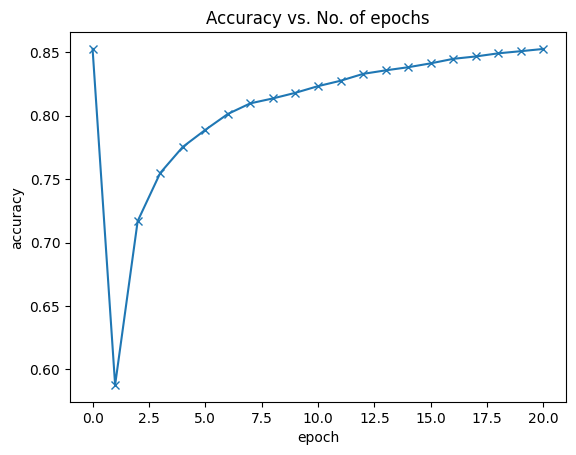

In [86]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Testing with individual images

In [88]:
# Define test dataset
test_dataset = MNIST(root = '/content/drive/MyDrive/Deep Learning/pytorch_zero_to_gans/data',
                train = False,
                transform= transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
label: 7


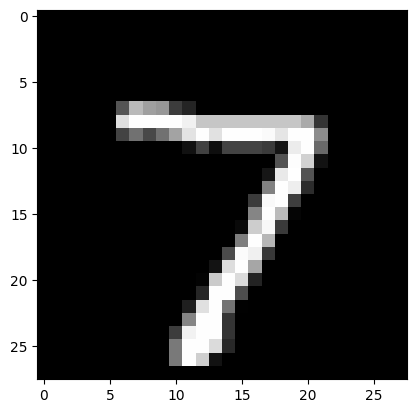

In [92]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Shape:', img.shape)
print('label:', label)

In [93]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [94]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)

  _, preds = torch.max(yb, dim = 1)
  return preds[0].item()

Label: 7 Predicted: 7


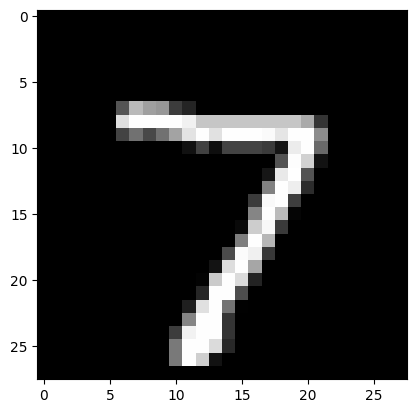

In [96]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

Label: 0 Predicted: 0


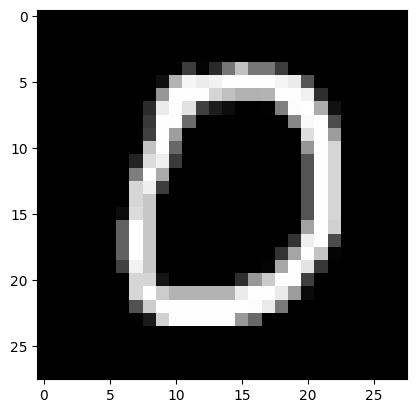

In [97]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

Label: 9 Predicted: 9


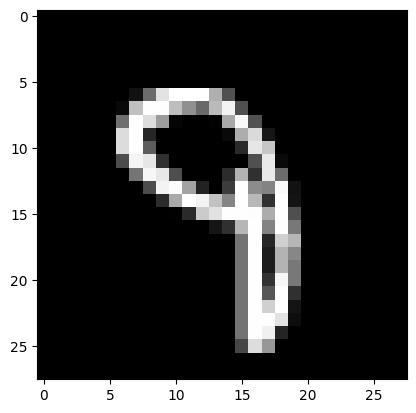

In [98]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

Label: 2 Predicted: 8


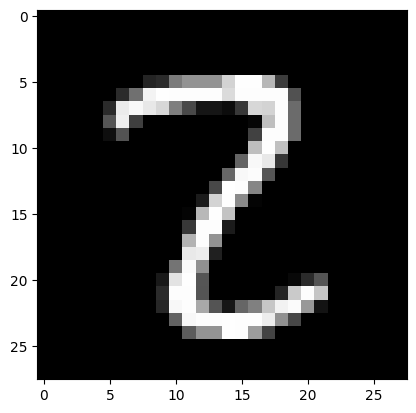

In [99]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

In [100]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6414044499397278, 'val_acc': 0.8592773675918579}

# Saving and loading the model

In [102]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0005, -0.0189,  0.0306,  ...,  0.0046,  0.0338,  0.0331],
                      [ 0.0249, -0.0130, -0.0222,  ..., -0.0091,  0.0105, -0.0196],
                      [-0.0077, -0.0291, -0.0349,  ...,  0.0177, -0.0278,  0.0271],
                      ...,
                      [ 0.0025,  0.0006,  0.0274,  ...,  0.0072,  0.0347, -0.0003],
                      [ 0.0002,  0.0288,  0.0193,  ...,  0.0003, -0.0314,  0.0116],
                      [ 0.0185, -0.0166,  0.0220,  ...,  0.0310,  0.0044, -0.0210]])),
             ('linear.bias',
              tensor([-0.0630,  0.0882, -0.0071, -0.0469,  0.0018,  0.0492, -0.0118,  0.0141,
                      -0.1182, -0.0443]))])

In [103]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [105]:
model2 = MnistModel() # You first instantiate the model
model2.load_state_dict(torch.load('mnist-logistic.pth')) # Then you load it
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0005, -0.0189,  0.0306,  ...,  0.0046,  0.0338,  0.0331],
                      [ 0.0249, -0.0130, -0.0222,  ..., -0.0091,  0.0105, -0.0196],
                      [-0.0077, -0.0291, -0.0349,  ...,  0.0177, -0.0278,  0.0271],
                      ...,
                      [ 0.0025,  0.0006,  0.0274,  ...,  0.0072,  0.0347, -0.0003],
                      [ 0.0002,  0.0288,  0.0193,  ...,  0.0003, -0.0314,  0.0116],
                      [ 0.0185, -0.0166,  0.0220,  ...,  0.0310,  0.0044, -0.0210]])),
             ('linear.bias',
              tensor([-0.0630,  0.0882, -0.0071, -0.0469,  0.0018,  0.0492, -0.0118,  0.0141,
                      -0.1182, -0.0443]))])

In [106]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6414044499397278, 'val_acc': 0.8592773675918579}